In [0]:
import numpy 
print(numpy.__version__)

In [0]:
import matplotlib
print(matplotlib.__version__)

In [0]:
import sklearn
print(sklearn.__version__)

In [0]:
import keras
print(keras.__version__)

In [0]:
import tqdm
print(tqdm.__version__)

In [0]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# 共有120种狗狗的品种
num_classes = 120

# 定义加载数据集的函数
def load_dataset(path):
    # 通过sklearn提供的load_files()方法加载文件
    # 返回一个类字典对象，包含文件相对路径和文件所属编号
    data = load_files(path)
    # 将文件路径转变成NumPy对象
    dog_files = np.array(data['filenames'])
    # 狗狗的每张图片都按照顺序排成列表
    raw_targets = np.array(data['target'])
    # 通过to_categorical()方法将文件所属编号转换成二进制类别矩阵（就是one-hot encoding）
    dog_targets = np_utils.to_categorical(raw_targets, num_classes)
    # 返回所有图片文件路径，图片文件编号和图片文件的二进制类别矩阵
    return dog_files, raw_targets, dog_targets
  
# 加载数据集
dog_filepaths, dog_raw_targets, dog_targets = load_dataset('Images/')

# 加载狗狗的品种名称列表
# glob是一个文件操作相关的模块，通过指定的匹配模式，返回相应的文件或文件夹路径
# 这里的操作就是返回Images目录下的所有文件夹
# 最后通过列表推导式遍历每个文件路径字符串，并截取狗狗类别名称那段字符串
dogpath_prefix_len = len('Images/n02085620-')
dog_names = [item[dogpath_prefix_len:] for item in sorted(glob("Images/*"))]

print('狗狗的品种有{}种。'.format(len(dog_names)))
print('狗狗的图片一共有{}张。\n'.format(len(dog_filepaths)))

狗狗的品种有120种。
狗狗的图片一共有20580张。



In [0]:
dog_names[:5]

['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih-Tzu']

In [0]:
dog_filepaths[:5]

array(['Images/n02098105-soft-coated_wheaten_terrier/n02098105_2842.jpg',
       'Images/n02091467-Norwegian_elkhound/n02091467_4110.jpg',
       'Images/n02111129-Leonberg/n02111129_2617.jpg',
       'Images/n02088238-basset/n02088238_11281.jpg',
       'Images/n02089867-Walker_hound/n02089867_1243.jpg'], dtype='<U67')

In [0]:
dog_raw_targets[:10]

array([ 51,  23, 103,  10,  15, 105,  49,  11,  58, 105])

In [0]:
dog_targets[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [0]:
from sklearn.model_selection import train_test_split

# 为了训练更快些，也考虑到一些读者的本地机器性能不高，我们就用前9000张狗狗的图片吧
# 如果读者的机器性能还不错，那就注释这两行，直接训练所有的图片数据
dog_filepaths = dog_filepaths[:9000]
dog_targets = dog_targets[:9000]

# 分割训练数据集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(dog_filepaths, dog_targets, test_size=0.2)

# 将测试集数据分割一半给验证集
half_test_count = int(len(X_test) / 2)
X_valid = X_test[:half_test_count]
y_valid = y_test[:half_test_count]

X_test = X_test[half_test_count:]
y_test = y_test[half_test_count:]

print("X_train.shape={}, y_train.shape={}.".format(X_train.shape, y_train.shape))
print("X_valid.shape={}, y_valid.shape={}.".format(X_valid.shape, y_valid.shape))
print("X_test.shape={}, y_test.shape={}.".format(X_test.shape, y_test.shape))

X_train.shape=(7200,), y_train.shape=(7200, 120).
X_valid.shape=(900,), y_valid.shape=(900, 120).
X_test.shape=(900,), y_test.shape=(900, 120).


In [0]:
import matplotlib.pyplot as plt
# 设置matplotlib在绘图时的默认样式
plt.style.use('default')

from matplotlib import image

['Images/n02089078-black-and-tan_coonhound/n02089078_3893.jpg'
 'Images/n02090622-borzoi/n02090622_3210.jpg'
 'Images/n02096294-Australian_terrier/n02096294_4295.jpg'
 'Images/n02092339-Weimaraner/n02092339_3698.jpg'
 'Images/n02088466-bloodhound/n02088466_10724.jpg'
 'Images/n02108089-boxer/n02108089_8739.jpg'
 'Images/n02102040-English_springer/n02102040_1519.jpg'
 'Images/n02086079-Pekinese/n02086079_19690.jpg'
 'Images/n02094433-Yorkshire_terrier/n02094433_9618.jpg']


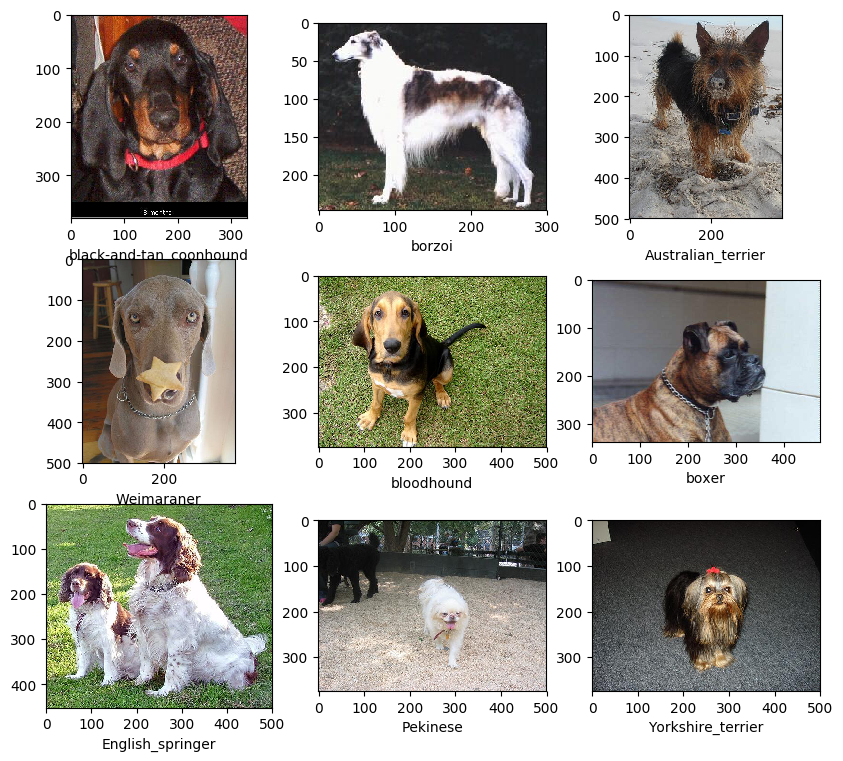

In [0]:
# 查看随机9张狗狗的图像
def draw_random_9_dog_images():
    # 创建9个绘图对象，3行3列
    fig, axes = plt.subplots(nrows=3, ncols=3)
    # 设置绘图的总容器大小
    fig.set_size_inches(10, 9)

    # 随机选择9个数，也就是9个品种的狗（可能重复，且每次都不一样）
    random_9_nums = np.random.choice(len(X_train), 9)
    # 从训练集中选出9张图
    random_9_imgs = X_train[random_9_nums]
    print(random_9_imgs)

    # 根据这随机的9张图片路径，截取取得相应的狗狗品种名称
    imgname_list = []
    for imgpath in random_9_imgs:
        imgname = imgpath[dogpath_prefix_len:] 
        imgname = imgname[:imgname.find('/')]
        imgname_list.append(imgname)

    index = 0
    for row_index in range(3): # 行
        for col_index in range(3): # 列
            # 读取图片的数值内容
            img = image.imread(random_9_imgs[index])
            # 获取绘图Axes对象，根据[行索引, 列索引]
            ax = axes[row_index, col_index]
            # 在Axes对象上显示图像
            ax.imshow(img)
            # 在绘图对象上设置狗狗品种名称
            ax.set_xlabel(imgname_list[index])
            # 索引加1
            index += 1
            
draw_random_9_dog_images()

In [0]:
# 对数据集进行遍历，读取每张图片，并获取它的大小，
# 最后返回的图片shape存储在变量dogs_shape_list列表里
dogs_shape_list = []
for filepath in dog_filepaths:
    shape = image.imread(filepath).shape
    if len(shape) == 3:
        dogs_shape_list.append(shape)
             
dogs_shapes = np.asarray(dogs_shape_list)

print("总共{}张。".format(len(dogs_shapes)))
print("随机抽取三张图片的维度是{}。".format(dogs_shapes[np.random.choice(len(dogs_shapes), 3)]))

总共9000张。
随机抽取三张图片的维度是[[500 361   3]
 [179 237   3]
 [375 500   3]]。


In [0]:
dogs_mean_width = np.mean(dogs_shapes[:,0])
dogs_mean_height = np.mean(dogs_shapes[:,1])
print("狗狗的图片的平均宽：{:.1f} * 平均高：{:.1f}。".format(dogs_mean_width, dogs_mean_height))

狗狗的图片的平均宽：384.5 * 平均高：439.1。


Text(0,0.5,'Image Height')

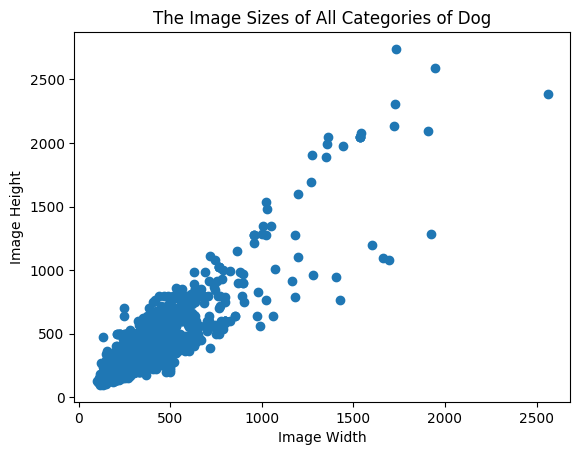

In [0]:
# 显示图片的宽和高的范围
plt.plot(dogs_shapes[:, 0], dogs_shapes[:, 1], "o")
# 设置图的标题
plt.title("The Image Sizes of All Categories of Dog")
# 设置图的X轴标题
plt.xlabel("Image Width")
# 设置图的Y轴的标题
plt.ylabel("Image Height")

Text(0.5,1,'Dog Images Width Distribution')

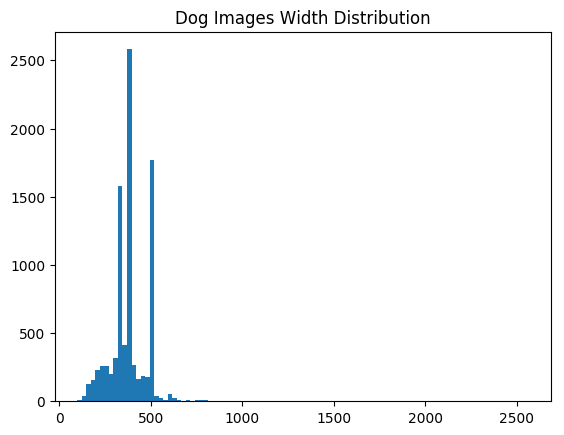

In [0]:
plt.hist(dogs_shapes[:, 0], bins=100)
plt.title("Dog Images Width Distribution")

Text(0.5,1,'Dog Images Height Distribution')

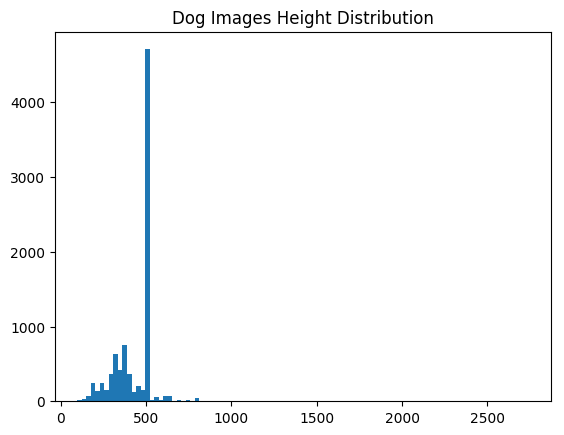

In [0]:
plt.hist(dogs_shapes[:, 1], bins=100)
plt.title("Dog Images Height Distribution")

In [0]:
from keras.preprocessing import image                  
from tqdm import tqdm

# 定义一个函数，将每张图片都转换成标准大小(1, 224, 224, 3)
def path_to_tensor(img_path):
    # 加载图片
    # 图片对象的加载用的是PIL库，通过load_img()方法返回的就是一个PIL对象
    img = image.load_img(img_path, target_size=(224, 224, 3))
    # 将PIL图片对象类型转化为格式(224, 224, 3)的3维张量
    x = image.img_to_array(img)
    # 将3维张量转化格式为(1, 224, 224, 3)的4维张量并返回
    return np.expand_dims(x, axis=0)

# 定义一个函数，将数组里的所有路径的图片都转换成图像数值类型并返回
def paths_to_tensor(img_paths):
    # tqdm模块表示使用进度条显示，传入一个所有图片的数组对象
    # 将所有图片的对象一个个都转换成numpy数值对象张量后，并返回成数组
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    # 将对象垂直堆砌排序摆放
    return np.vstack(list_of_tensors)

In [0]:
from PIL import ImageFile 
# 为了防止PIL读取图片对象时出现IO错误，则设置截断图片为True
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# 将所有图片都转换成标准大小的数值图像对象，然后除以255，进行归一化处理
# RGB的颜色值，最大为255，最小为0
# 对训练集数据进行处理
train_tensors = paths_to_tensor(X_train).astype(np.float32) / 255
# 对验证集数据进行处理
valid_tensors = paths_to_tensor(X_valid).astype(np.float32) / 255
# 对测试集数据进行处理
test_tensors = paths_to_tensor(X_test).astype(np.float32) / 255

100%|██████████| 900/900 [00:03<00:00, 240.43it/s]


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

# 创建Sequential模型
model = Sequential()

# 创建输入层，输入层必须传入input_shape参数以表示图像大小，深度是16
model.add(Conv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), padding='same', 
                 activation='relu', input_shape=train_tensors.shape[1:]))
# 添加最大池化层，大小为2x2，有效范围默认是valid，就是说，不够2x2的大小的空间数据就丢弃了
model.add(MaxPooling2D(pool_size=(2, 2)))
# 添加Dropout层，每次丢弃20%的网络节点，防止过拟合
model.add(Dropout(0.2))

# 添加卷积层，深度是32，内核大小是2x2，跨步是1x1，有效范围是same则表示不够数据范围的就用0填充
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
# 添加最大池化层，大小为2x2，有效范围默认是valid，就是说，不够2x2的大小的空间数据就丢弃了
model.add(MaxPooling2D(pool_size=(2, 2)))
# 添加Dropout层，每次丢弃20%的网络节点，防止过拟合
model.add(Dropout(0.2))

# 添加卷积层，深度是64
model.add(Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 添加全局平均池化层
model.add(GlobalAveragePooling2D())
# 添加Dropout，每次丢弃50%
model.add(Dropout(0.5))
# 添加输出层，120个类别输出
model.add(Dense(num_classes, activation="softmax"))
                 
# 打印输出网络模型架构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
__________

In [0]:
# 编译模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
!mkdir saved_models

In [0]:
from keras.callbacks import ModelCheckpoint 


epochs = 20
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, 
                               save_best_only=True)

model.fit(train_tensors, 
          y_train, 
          validation_data=(valid_tensors, y_valid),
          epochs=epochs, 
          batch_size=20, 
          callbacks=[checkpointer], 
          verbose=1)

Train on 7200 samples, validate on 900 samples
Epoch 1/20
7200/7200 [==============================] - 20s 3ms/step - loss: 4.7886 - acc: 0.0093 - val_loss: 4.7861 - val_acc: 0.0122

Epoch 00001: val_loss improved from inf to 4.78609, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 2/20
7200/7200 [==============================] - 16s 2ms/step - loss: 4.7824 - acc: 0.0117 - val_loss: 4.7833 - val_acc: 0.0078

Epoch 00002: val_loss improved from 4.78609 to 4.78332, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 3/20
7200/7200 [==============================] - 16s 2ms/step - loss: 4.7767 - acc: 0.0135 - val_loss: 4.7788 - val_acc: 0.0133

Epoch 00003: val_loss improved from 4.78332 to 4.77882, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 4/20
7200/7200 [==============================] - 16s 2ms/step - loss: 4.7622 - acc: 0.0160 - val_loss: 4.7800 - val_acc: 0.0122

Epoch 00004: val_loss did not improve from 4.77882
Epoch 5/20
720

In [0]:
## 加载具有最好验证权重的模型
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

# 获取测试数据集中每一个图像所预测的狗品种的index
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# 测试准确率
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(y_test, axis=1))/len(dog_breed_predictions)
print('Test Accuracy: {:.4f}'.format(test_accuracy))

Test Accuracy: 3.2222


# 使用InceptionV3预训练预测狗狗品种

In [0]:
from keras.preprocessing import image

def plot_bar(predictions):
    types = [pred[1] for pred in predictions]
    probs = [pred[2] for pred in predictions]
    
    plt.barh(np.arange(len(probs)), probs)
    _ = plt.yticks(np.arange(len(predictions)), types)
    plt.show()
    

def load_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return x

In [0]:
import matplotlib
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

def predicts_inceptionV3(img_path):
    """
    通过预训练模型InceptionV3直接预测
    """
    # 加载图片
    x = load_img(img_path)
    # 预处理图片数值
    x = preprocess_input(x)
    
    # 加载InceptionV3预训练模型
    # 如果本地不存在该模型，就下载
    model = InceptionV3(weights='imagenet')
    # 预测狗狗品种
    preds = model.predict(x)

    # 对预测的值解码，只显示前5个最大的值
    predictions = decode_predictions(preds, top=5)[0]
    
    # 1.绘直方图显示
    plot_bar(predictions)
    
    # 2.绘制原始图和预测概率图
    # 创建一个绘图对象
    fig, ax = plt.subplots()
    # 设置绘图的总容器大小
    fig.set_size_inches(5, 5)
    # 取出预测的品种名称和它对应的概率值
    fig_title = "".join(["{}: {:.5f}%\n".format(pred[1], pred[2]*100) for pred in predictions])
    # 设置在图像旁边的预测注解文字
    ax.text(1.01, 0.7, 
            fig_title, 
            horizontalalignment='left', 
            verticalalignment='bottom',
            transform=ax.transAxes)
    # 读取图片的数值内容
    img = matplotlib.image.imread(img_path)
    # 在Axes对象上显示图像
    ax.imshow(img)

40960/35363 [==================================] - 0s 5us/step


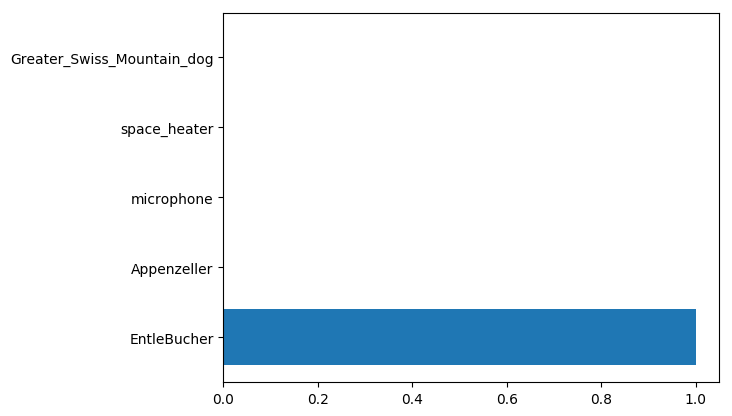

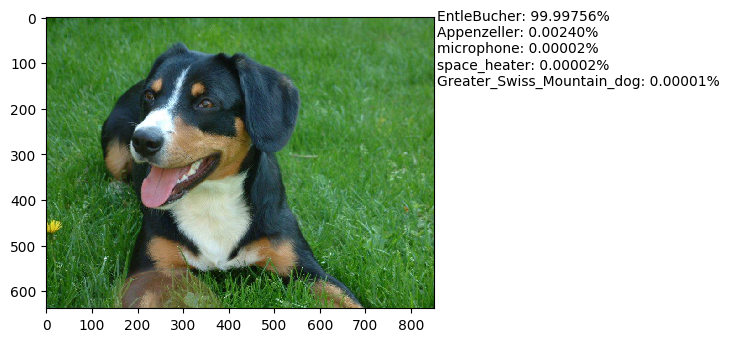

In [0]:
img_path = "Images/n02108000-EntleBucher/n02108000_93.jpg"
predicts_inceptionV3(img_path)

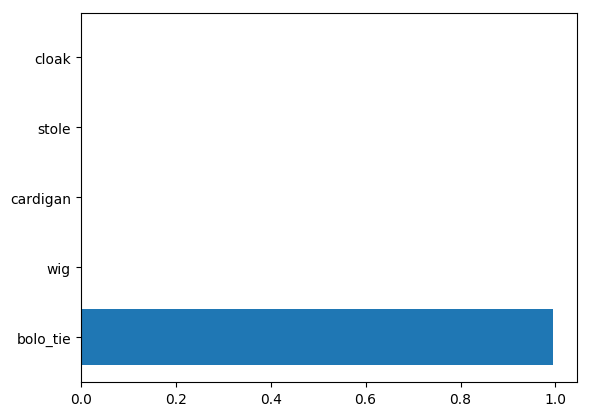

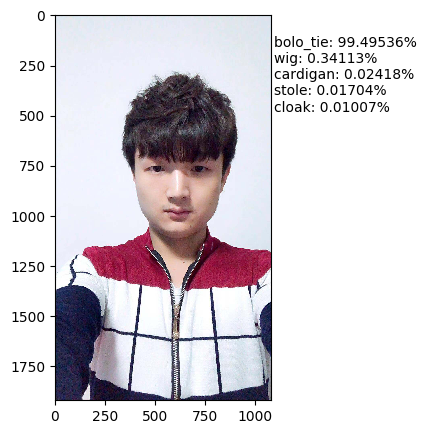

In [0]:
img_path = "victor_test.jpeg"
predicts_inceptionV3(img_path)

# 使用InceptionV3预训练模型再训练狗狗品种，然后预测

87916544/87910968 [==============================] - 7s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


首次训练模型
Epoch 1/5
57/56 [==============================] - 127s 2s/step - loss: 3.4597 - acc: 0.2658 - val_loss: 4.8809 - val_acc: 0.0111

Epoch 00001: val_loss improved from inf to 4.88093, saving model to inception_v3.dogs.133.best.weights.h5
Epoch 2/5
57/56 [==============================] - 106s 2s/step - loss: 2.1034 - acc: 0.4706 - val_loss: 4.9190 - val_acc: 0.0111

Epoch 00002: val_loss did not improve from 4.88093
Epoch 3/5
57/56 [==============================] - 110s 2s/step - loss: 1.8330 - acc: 0.5223 - val_loss: 4.9474 - val_acc: 0.0156

Epoch 00003: val_loss did not improve from 4.88093
Epoch 4/5
57/56 [==============================] - 111s 2s/step - loss: 1.6874 - acc: 0.5561 - val_loss: 5.0963 - val_acc: 0.0044

Epoch 00004: val_loss did not improve from 4.88093
Epoch 5/5
57/56 [==============================] - 110s 2s/step - loss: 1.5734 - acc: 0.5758 - val_loss: 5.0750 - val_acc: 0.0111

Epoch 00005: val_loss did not improve from 4.88093
微调模型后，再次训练模型
Epoch 1/5
57/56

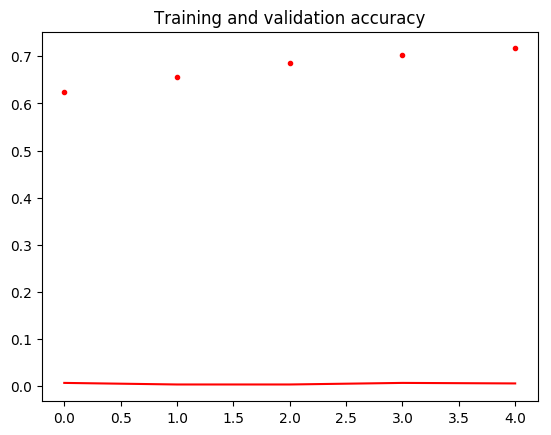

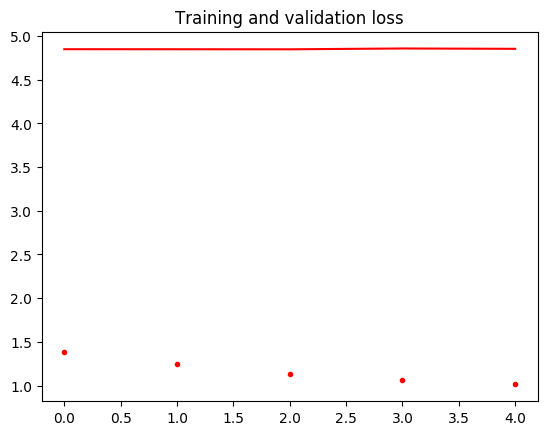

In [0]:
# 导入InceptionV3预训练模型和数据处理模块
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
# 导入构建Keras的Model所需模块
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint  
# 导入图片数据增强生成器
from keras.preprocessing.image import ImageDataGenerator


class InceptionV3Retrained:
    """
    定义一个类，用来在预训练模型上去训练新的数据
    """
    

    def add_new_last_layers(self, base_model, num_classes):
        """
        添加新的全连接层
        """
        # 添加一个全局空间平均池化层
        x = base_model.output
        x = GlobalAveragePooling2D()(x)

        # 添加1024个全连接层
        x = Dense(1024, activation='relu')(x)

        # 添加全连接输出层，有num_classes个类别输出，使用softmax多类别分类激活函数
        predictions = Dense(num_classes, activation='softmax')(x)

        # 通过上面定义的base_model对象和它的输出层
        # 我们自定义创建一个新的Keras的Model模型对象
        model = Model(input=base_model.input, output=predictions)
        return model


    def freeze_previous_layers(self, model, base_model):
        """
        冻结预训练模型之前的层
        """
        # 冻结InceptionV3模型的所有卷积层，因为我们迁移学习就是对顶部的几个层进行训练
        for layer in base_model.layers:
            layer.trainable = False

        # 编译模型
        # 优化器rmsprop，参数使用默认值即可
        # 分类交叉熵使用多类别的
        model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


    def fine_tune_model(self, model):
        """
        微调模型
        """
        # 我们冻结模型的前面172层，然后把剩下的层数都解冻
        for layer in model.layers[:172]:
            layer.trainable = False
        for layer in model.layers[172:]:
            layer.trainable = True

        # 再编译模型
        # 优化器使用随机梯度下降，学习率我们调小点0.0001
        # 分类交叉熵依旧使用多类别的
        model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
  
  
    def plot_training(self, history):
        """
        绘制训练模型时的损失值和精确度
        """
        # 取出训练时的精确度
        acc = history.history['acc']
        # 取出验证时的精确度
        val_acc = history.history['val_acc']
        # 取出训练时的损失值
        loss = history.history['loss']
        # 取出验证时的损失值
        val_loss = history.history['val_loss']
        # 根据精确度的个数，就可以得知训练了多少次
        epochs = range(len(acc))

        # 绘制训练精确度和验证精确度
        plt.plot(epochs, acc, 'r.')
        plt.plot(epochs, val_acc, 'r')
        plt.title('Training and validation accuracy')

        # 绘制训练损失和验证损失
        plt.figure()
        plt.plot(epochs, loss, 'r.')
        plt.plot(epochs, val_loss, 'r-')
        plt.title('Training and validation loss')
        plt.show()


    def train(self, num_classes, batch_size, epochs):
        """
        训练模型
        """

        # 定义训练数据增强生成器
        # 参数preprocessing_function表示每次输入都进行预处理
        # 参数rotation_range表示图像随机旋转的度数范围
        # 参数width_shift_range表示图像的宽度可移动范围
        # 参数height_shift_range表示图像的高度可移动范围
        # 参数shear_range表示逆时针方向剪切角度
        # 参数zoom_range表示随机缩放的角度值
        # 参数horizontal_flip表示是否水平翻转
        train_datagen = ImageDataGenerator(
          preprocessing_function=preprocess_input,
          rotation_range=20,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True
        )
        
        # 定义验证数据增强生成器
        valid_datagen = ImageDataGenerator(
          preprocessing_function=preprocess_input,
          rotation_range=20,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True
        )

        # 训练数据增强
        train_generator = train_datagen.flow(train_tensors, y_train, batch_size=batch_size)
        # 验证数据增强
        validation_generator = valid_datagen.flow(valid_tensors, y_valid, batch_size=batch_size)

        # 初始化InceptionV3模型
        # include_top=False表示初始化模型时不包含InceptionV3网络结构层中的最后的全连接层
        base_model = InceptionV3(weights='imagenet', include_top=False)  
        
        # 添加新的全连接层
        model = self.add_new_last_layers(base_model, num_classes)

        # 冻结刚创建的InceptionV3的模型的所有卷积层
        self.freeze_previous_layers(model, base_model)
        
        # 定义模型检查点，只保存最佳的
        checkpointer = ModelCheckpoint(filepath='inception_v3.dogs.133.best.weights.h5', 
                                       verbose=1, 
                                       save_best_only=True)

        print("首次训练模型")
        # 在新数据集上训练模型
        history_tl = model.fit_generator(train_generator, 
                          steps_per_epoch=train_tensors.shape[0] / batch_size, 
                          validation_steps=valid_tensors.shape[0] / batch_size, 
                          epochs=epochs,
                          verbose=1, 
                          callbacks=[checkpointer], 
                          validation_data=validation_generator)

        # 微调模型
        self.fine_tune_model(model)

        print("微调模型后，再次训练模型")
        # 我们再次训练模型
        history_ft = model.fit_generator(train_generator, 
                          steps_per_epoch=train_tensors.shape[0] / batch_size, 
                          validation_steps=valid_tensors.shape[0] / batch_size,
                          epochs=epochs,
                          verbose=1, 
                          callbacks=[checkpointer], 
                          validation_data=validation_generator)

        # 绘制模型的损失值和精确度
        self.plot_training(history_ft)

# 每批次大小是128
batch_size = 128
# 训练5个批次
epochs = 5

incepV3_model = InceptionV3Retrained()
incepV3_model.train(num_classes, batch_size, epochs)

In [0]:
# 测试模型的精确度
# 创建一个不带全连接层的InceptionV3模型
test_model = InceptionV3(weights='imagenet', include_top=False, input_shape=test_tensors.shape[1:]) 

# 添加全连接层输出层
incepV3_model = InceptionV3Retrained()
trained_model = incepV3_model.add_new_last_layers(test_model, num_classes)

# 加载刚才训练的权重到模型中
trained_model.load_weights("inception_v3.dogs.133.best.weights.h5") 

# 编译模型
trained_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 通过summary()方法，可以看到完整的InceptionV3的神经网络模型架构
# trained_model.summary()

# 评估模型
score = trained_model.evaluate(test_tensors, y_test, verbose=1)
print("Test {}: {:.2f}. Test {}: {:.2f}.".format(trained_model.metrics_names[0], 
                                                 score[0]*100, 
                                                 trained_model.metrics_names[1], 
                                                 score[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


900/900 [==============================] - 11s 13ms/step
Test loss: 79.95. Test acc: 78.22.


In [0]:
import matplotlib

# 预测狗狗品种
def predict_dog_breed(model, img_path):
    # 加载图像
    x = load_img(img_path)
    # 图片预处理
    x = preprocess_input(x)
    # 模型预测
    predictions = model.predict(x)
    # 取出预测数值
    prediction_list = predictions[0]

    # 取出最大值索引和最大值
    def get_max_arg_value(prediction_list):
        arg_max = np.argmax(prediction_list)
        max_val = prediction_list[arg_max]
        preds = np.delete(prediction_list, arg_max)
        return preds, arg_max, max_val

    # 取出前3个预测值的最大值索引和最大值
    def get_list_of_max_arg_value(prediction_list):
        preds, argmax1, max1val = get_max_arg_value(prediction_list)
        preds, argmax2, max2val = get_max_arg_value(preds)
        preds, argmax3, max3val = get_max_arg_value(preds)

        top_3_argmax = np.array([argmax1, argmax2, argmax3])
        top_3_max_val = np.array([max1val, max2val, max3val])
        return top_3_argmax, top_3_max_val

    top_3_argmax, top_3_max_val = get_list_of_max_arg_value(prediction_list)
    dog_titles = [dog_names[index] for index in top_3_argmax]

    print('前3个最大值: {}'.format(top_3_max_val))

#     # 如果希望显示直方图，可以取消注释这三行代码
#     plt.barh(np.arange(3), top_3_max_val)
#     plt.yticks(np.arange(3), dog_titles)
#     plt.show()
    
    # 创建绘图对象
    fig, ax = plt.subplots()
    # 设置绘图的总容器大小
    fig.set_size_inches(5, 5)
    # 将最大值乘以100就是百分比
    top_3_max_val *= 100
    # 拼接前三个最大值的字符串
    dog_title = "{}: {:.2f}%\n".format(dog_titles[0], top_3_max_val[0]) + \
                "{}: {:.2f}%\n".format(dog_titles[1], top_3_max_val[1]) + \
                "{}: {:.2f}%\n".format(dog_titles[2], top_3_max_val[2])
    # 在绘图的右上角显示加上识别的值字符串
    ax.text(1.01, 0.8, 
            dog_title, 
            horizontalalignment='left', 
            verticalalignment='bottom',
            transform=ax.transAxes)
    # 读取图片的数值内容
    img = matplotlib.image.imread(img_path)
    # 在Axes对象上显示图像
    ax.imshow(img)

前3个最大值: [9.8670667e-01 1.1374239e-02 7.6139707e-04]


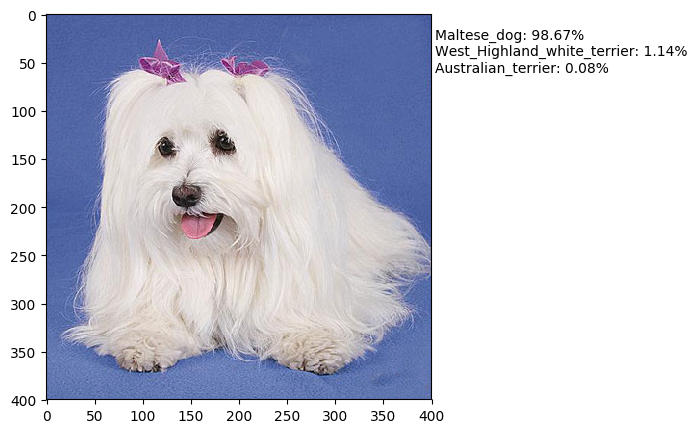

In [0]:
img_path = "Maltese_06726.jpg"
predict_dog_breed(trained_model, img_path)

前3个最大值: [0.06047499 0.05180571 0.04174609]


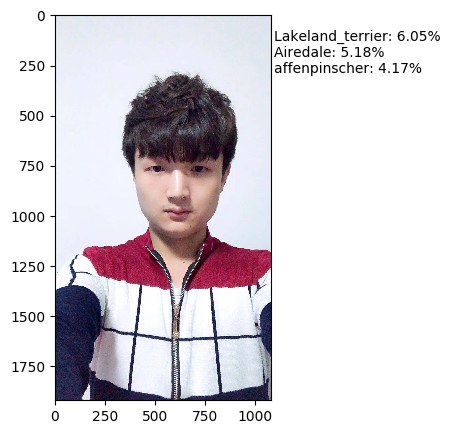

In [0]:
img_path = "victor_test.jpeg"
predict_dog_breed(trained_model, img_path)

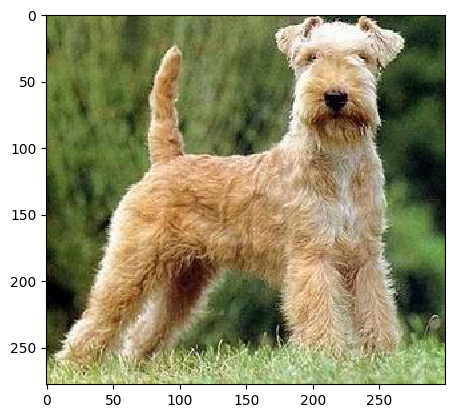

In [0]:
import matplotlib
img = matplotlib.image.imread('Images/n02095570-Lakeland_terrier/n02095570_95.jpg')
plt.imshow(img)